In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip drive/My\ Drive/projectds.zip

Streaming output truncated to the last 5000 lines.
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: projectds/train/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: pr

In [3]:
!unzip drive/My\ Drive/projectds.zip > /dev/null

replace projectds/test/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [5]:
IMAGE_SIZE=[224,224]

In [6]:
train_path='/content/projectds/train'

In [7]:
test_path='/content/projectds/test'

In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [9]:
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [10]:
for layer in mobilnet.layers:
    layer.trainable = False

In [11]:
x = Flatten()(mobilnet.output)

In [12]:
prediction = Dense(len(train_path), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Create Model from scratch using CNN

In [14]:
from tensorflow.keras.layers import MaxPooling2D

In [15]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
test_set = test_datagen.flow_from_directory('/content/projectds/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 27558 images belonging to 2 classes.


In [19]:
training_set = train_datagen.flow_from_directory('/content/projectds/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 27547 images belonging to 2 classes.


In [21]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
861/861 [==============================] - 326s 379ms/step - loss: 0.1570 - accuracy: 0.9506 - val_loss: 0.1466 - val_accuracy: 0.9540
Epoch 2/5
861/861 [==============================] - 325s 378ms/step - loss: 0.1439 - accuracy: 0.9551 - val_loss: 0.1490 - val_accuracy: 0.9541
Epoch 3/5
861/861 [==============================] - 323s 375ms/step - loss: 0.1484 - accuracy: 0.9523 - val_loss: 0.1416 - val_accuracy: 0.9521
Epoch 4/5
861/861 [==============================] - 324s 376ms/step - loss: 0.1382 - accuracy: 0.9546 - val_loss: 0.1339 - val_accuracy: 0.9589
Epoch 5/5
861/861 [==============================] - 322s 374ms/step - loss: 0.1358 - accuracy: 0.9561 - val_loss: 0.1179 - val_accuracy: 0.9612


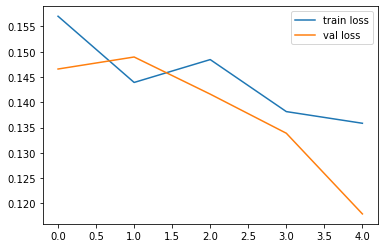

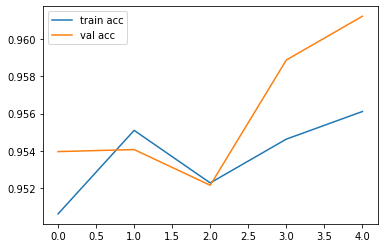

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')
 

In [25]:
y_pred = model.predict(test_set)
y_pred

array([[9.9702328e-01, 2.9766820e-03],
       [9.9898940e-01, 1.0106084e-03],
       [9.9992180e-01, 7.8200545e-05],
       ...,
       [2.8272318e-02, 9.7172767e-01],
       [9.2873102e-01, 7.1269013e-02],
       [9.9999893e-01, 1.0546571e-06]], dtype=float32)

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_vgg19.h5')

In [30]:
img=image.load_img('/content/projectds/test/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png',target_size=(224,224))

In [31]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

In [37]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
